<a href="https://colab.research.google.com/github/DristantaNirola/EDA-AirBnB_BOOKING_ANALYSIS/blob/main/Team_1_24_02_2021_%5BABTN0101%5D_AirBnB_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##[ABTN0101] AirBnB Bookings Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Introduction -

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

Dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

Explore and analyze the data to discover key understandings (not limited to these) such as : 

1.What can we learn about different hosts and areas?

2.What can we learn from predictions? (ex: locations, prices, reviews, etc)

3.Which hosts are the busiest and why?

4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?

##Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


##Loading the data set

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Week 4/Capstone Project/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(path)

##Exploring the data


In this step we are going to perform the following operations..
*   Checking the shape of the dataframe.
*   Checking the info of the dataset.
*   Printing the head of the dataset.
*   Checking the summary of the dataset.




In [ ]:
#checking the shape of airbnb_df
airbnb_df.shape

(48895, 16)

In [ ]:
#checking the info of airbnb_df
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
#Printing the summary of numerical attributes
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


*  id -  It contains the unique id of the listings.
*  name - It contains the description of the listing. The more beautiful and attractive the name is the more people it attract.
*  host_id - It contains unique host_id related to every host_name.
*  host_name -It contains host name of the respective hosts.
*  neighbourhood_group - It contains five neighbourhood groups of NewYork city.
*  neighbourhood - It contains the sub part of neighbouhood group.
*  latitude - It contains latitudes of the listed location.
*  longitude -It contains longitudes of the listed location.
*  room_type - It is a categorical column which contains the room types of the listings. 
*  price - It contains prices of the listings.
*  minimum_nights - It restricts the minimum number of nights for booking.
*  number_of_reviews - It contains the number of reviews of that particular listing.
*  last_review - It contains the last review date of that listing.
*  reviews_per_month - It contains the number of reviews received per month by that listing.
*  calculated_host_listings_count - It contains the total number of listings one particular host has.
*  availability_365 - It reflects the current availability of the listing in a year.

In [ ]:
#parsing the last review from object to date
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])
airbnb_df['availability_365'] = pd.to_timedelta(airbnb_df['availability_365'])

##**Handling the missing values**

##Check for Missing Data

In [ ]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

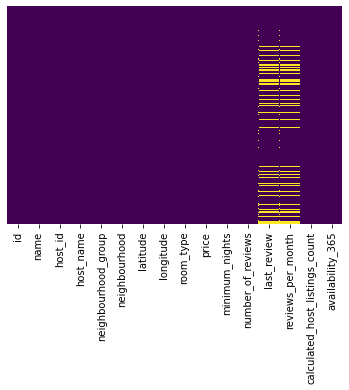

In [ ]:
#checking the missing data in the dataset
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (10, 5)


##Cleaning the data 

We can see in the data that last_month and number_of_reviews are na when number_of_reviews are 0 , so it makes sence we just need to assign them appropriate values

*   **number_of_reviews** we'll assign this to 0 as total number of reviews  are 0
*   **last_reviews** we'll assign NA to this as we wo'nt be using this column for most of the analysis except for the analysis that are based on the availability of listing or if it is active now same goes with **availability_365** we'll use this to answer questions on how busy a host is ,when we are doing those analysis we'll remove rows with null values as those contains large chunk of rows and it doesn't make sense to remove them when we don't need these features



I am replacing NaN values of 'reviews_per_month' column with 0.

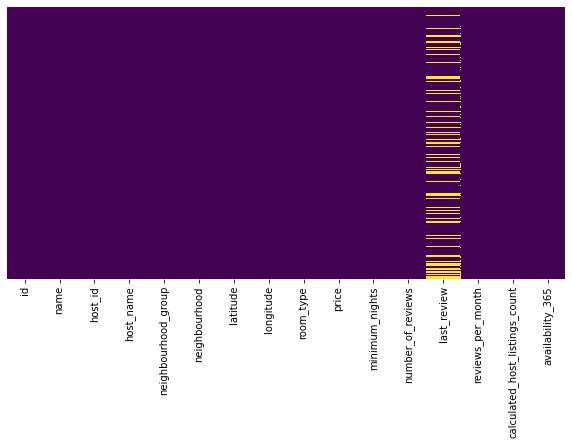

In [ ]:
#replacing NaN values of 'reviews_per_month' column with 0
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Checking the rows having null value in name and host_name column.**

In [ ]:
airbnb_df[airbnb_df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,0.00,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,0.00,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,0.00,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,0.00,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,0.00,5,0


We can see that 10 out of 16 of rows having **NaN** as name value have 0 reviews.
There may be a case that while listing the name was not entered and that's why people are not prefering those places.
So i am dropping those rows.

In [ ]:
#dropping those rows having null name value
new_airbnb_df=airbnb_df[~airbnb_df['name'].isnull()]

In [ ]:
airbnb_df[airbnb_df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,0 days 00:00:00.000000088
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,0 days 00:00:00.000000342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,0 days 00:00:00.000000359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaT,0.00,1,0 days 00:00:00
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0 days 00:00:00
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,0 days 00:00:00.000000318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0 days 00:00:00
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,0 days 00:00:00.000000342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaT,0.00,1,0 days 00:00:00
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0 days 00:00:00


In [ ]:
#dropping those rows having null host_name value
new_airbnb_df=new_airbnb_df[~new_airbnb_df['host_name'].isnull()]
new_airbnb_df.shape

(48858, 16)

##Plotting Rental listings on NY city map based on their latitude and longitude. 

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 5.6MB/s 
     |████████████████████████████████| 6.5MB 8.5MB/s 
     |████████████████████████████████| 14.8MB 315kB/s 


# Data types

We'll devide the data into the types

1. Categorical - id , name , host_id , neighbourhood_group , neighbourhood , room_type
2. Numerical - price , minimum_nights , number_of_reviews , reviews_per_month,calculated_host_listings_count,availability_365, latitude , longitude


We'll explore numerical data types first as they might contain outliers





count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


Text(0.5, 0, 'Price')

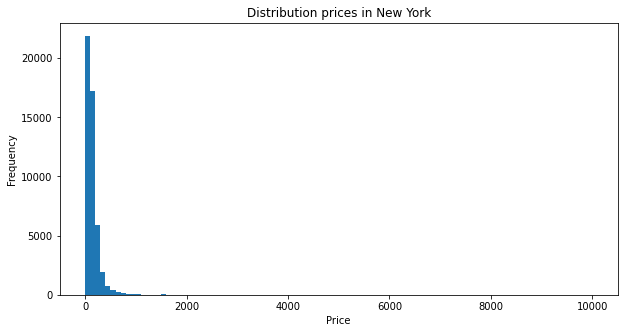

In [ ]:
print(airbnb_df['price'].describe())
airbnb_df['price'].plot.hist(bins=100)
plt.title('Distribution prices in New York')
plt.xlabel('Price')

As we can see from graph and describe most of the price is below 800 so we'll only consider that

In [ ]:
airbnb_df = airbnb_df[airbnb_df['price'] < 800]

Text(0.5, 0, 'Price')

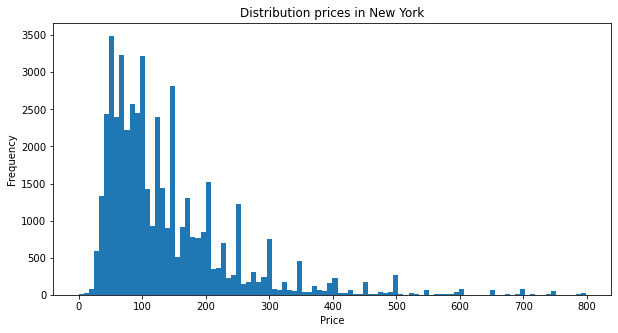

In [ ]:
#distribution of new values of new values
airbnb_df['price'].plot.hist(bins=100)
plt.title('Distribution prices in New York')
plt.xlabel('Price')

count    48421.000000
mean         6.979596
std         20.291590
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


Text(0.5, 0, 'minimum_nights')

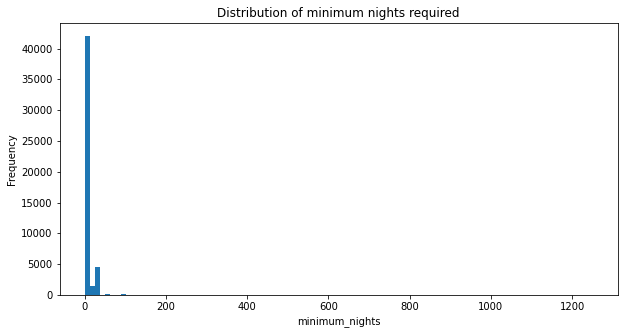

In [ ]:
print(airbnb_df['minimum_nights'].describe())
airbnb_df['minimum_nights'].plot.hist(bins=100)
plt.title('Distribution of minimum nights required')
plt.xlabel('minimum_nights')

We can see that most of the data is less than 10 but there is peak somewhere around 30

In [ ]:
#removing rows which are having minimum required nights as below 31
airbnb_df = airbnb_df[airbnb_df['minimum_nights'] <= 30]

Text(0.5, 0, 'minimum_nights')

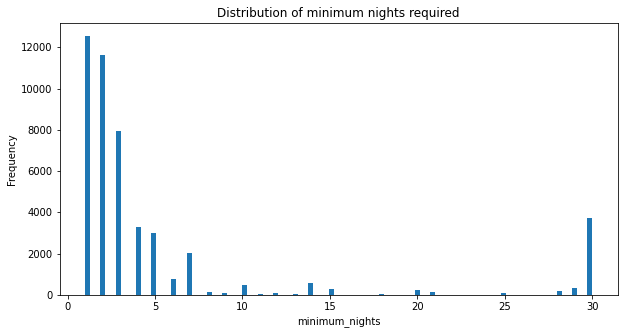

In [ ]:
airbnb_df['minimum_nights'].plot.hist(bins=100)
plt.title('Distribution of minimum nights required')
plt.xlabel('minimum_nights')

Yes this is as we speculated most of the values are skewed to 0 and there are some at 30

Now let us see categorical columns

Let us create segregate our data into unique values of each of the category one by one

1. neighbourhood
2. type_of_room
3. neighbourhood_groups
4. host_id

In [ ]:
def get_neighbourhood(row):
  return list(set(list(airbnb_df.loc[airbnb_df['neighbourhood_group'] == row,'neighbourhood'])))

def get_room_destribution(row):

  temp = airbnb_df[airbnb_df['neighbourhood_group']== row].groupby('room_type')['id'].count().reset_index()
  
  temp['number_of_listings'] = (airbnb_df.groupby('room_type')['id'].count().reset_index())['id']
  
  temp['id'] = temp['id'].div(temp['number_of_listings'].values,axis=0)
  
  temp.drop('number_of_listings',axis =1,inplace=True)
  temp['id'] = temp['id'].apply(lambda row: round(row*100,0))
  temp.sort_values('id',ascending=False,inplace=True)
  return temp.set_index('room_type').to_dict()['id']

In [ ]:
neighbourhood_df = (airbnb_df.groupby('neighbourhood_group')['id'].count().reset_index().sort_values('id',ascending=False).rename(columns={'id':'number_of_listings'}))
neighbourhood_df['percentage'] = neighbourhood_df['number_of_listings'].apply(lambda row: round(row*100/airbnb_df['id'].count(),2))
neighbourhood_df['number_of_reviews'] = (airbnb_df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index())['number_of_reviews']
neighbourhood_df['reviews_per_month'] = (airbnb_df.groupby('neighbourhood_group')['reviews_per_month'].sum().reset_index())['reviews_per_month']
neighbourhood_df['average_rice'] = (airbnb_df.groupby('neighbourhood_group')['price'].median().reset_index())['price']
neighbourhood_df['standard_deviation'] = (airbnb_df.groupby('neighbourhood_group')['price'].std().reset_index())['price']
neighbourhood_df['neighbourhoods'] = neighbourhood_df['neighbourhood_group'].apply(get_neighbourhood)
neighbourhood_df['room_distribution'] = neighbourhood_df['neighbourhood_group'].apply(get_room_destribution)

In [ ]:
neighbourhood_df

,neighbourhood_group,number_of_listings,percentage,number_of_reviews,reviews_per_month,average_rice,standard_deviation,neighbourhoods,room_distribution
2,Manhattan,20908,43.83,447409,20835.33,149,116.792492,"[Roosevelt Island, Upper West Side, Little Ita...","{'Entire home/apt': 51.0, 'Shared room': 41.0,..."
1,Brooklyn,19757,41.42,482381,20989.26,90,85.944341,"[Dyker Heights, Carroll Gardens, Mill Basin, C...","{'Private room': 45.0, 'Entire home/apt': 38.0..."
3,Queens,5598,11.74,156202,8860.59,75,69.286226,"[Rosedale, Ditmars Steinway, Astoria, Kew Gard...","{'Shared room': 17.0, 'Private room': 15.0, 'E..."
0,Bronx,1075,2.25,28318,1608.03,65,69.749097,"[Mott Haven, Olinville, Edenwald, Longwood, Pe...","{'Shared room': 5.0, 'Private room': 3.0, 'Ent..."
4,Staten Island,365,0.77,11540,586.99,75,76.004841,"[Graniteville, Arden Heights, Lighthouse Hill,...","{'Entire home/apt': 1.0, 'Private room': 1.0, ..."


**Conclusion**

*   From the dataframe we can see that people from Brooklyn are more likey to write a review than people from Manhattan despite being less in total number and the reason could be speculated as brooklyn listings are providing better services



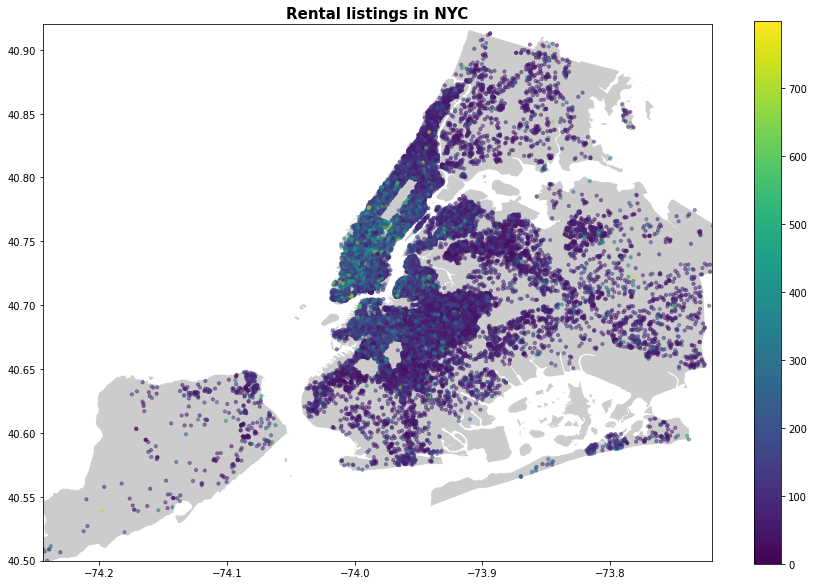

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
#loading the newyork city map
street_map = gpd.read_file('/content/drive/MyDrive/Boundaries/Borough Boundaries.zip (Unzipped Files)/geo_export_dbd0e1ff-776d-4f46-9c1f-42844dbaa345.shp')

# zip x and y coordinates
geometry = [Point(xy) for xy in zip(airbnb_df['longitude'], airbnb_df['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(airbnb_df,geometry = geometry)
 
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,10))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Rental listings in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.24442,-73.72)
plt.ylim( 40.49979,40.92)
# show map
plt.show()

# Area Analysis

*   Manhattan neighbourhood_group is most in demand followed by Brooklyn.





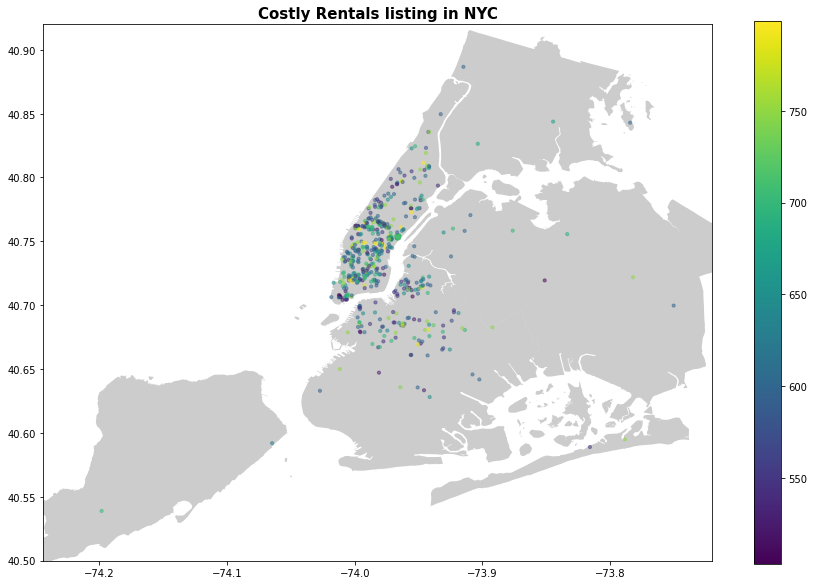

In [ ]:
#Extracting those rows having prices greater than 500
high_price_airbnb_df=airbnb_df[airbnb_df['price']>500]
# zip x and y coordinates
geometry = high_price_airbnb_df['geometry']
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(high_price_airbnb_df,geometry = geometry)
 
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,10))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Costly Rentals listing in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-74.24442,-73.72)
plt.ylim( 40.49979,40.92)
# show map
plt.show()

*  Most listings are in Manhattan region followed by Brooklyn region and least are in Staten island which can be seen from the density of the map.
*  The Central area of Manhattan region has no listings.That is a park named **Central Park** which comprises 6 percent of Manhattan's land area.
*  Most costly listings ( prices > 500$ ) are concentrated in Manhattan region and somewhat in Brooklyn too because that is where most of cities notable places are.

In [ ]:
high_price_airbnb_df.shape

(1044, 17)

<Figure size 936x504 with 0 Axes>

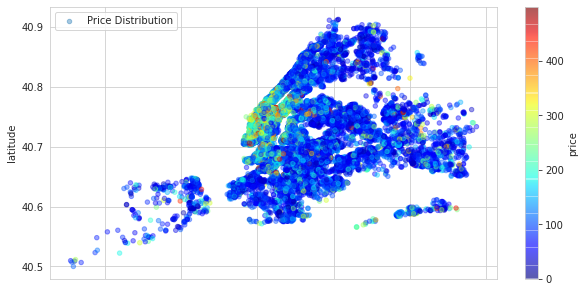

In [ ]:
plt.figure(figsize=(13,7))
ax=airbnb_df[airbnb_df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='Price Distribution',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

*  Here we can see that room type and neighborhood have an effect on the listing price, but not the number of listings in the neighborhood.
*  Manhattan has more high price listing as well as room-types like entire-home and private rooms are also costlier.

Text(0.5, 0, 'Neighbourhood`')

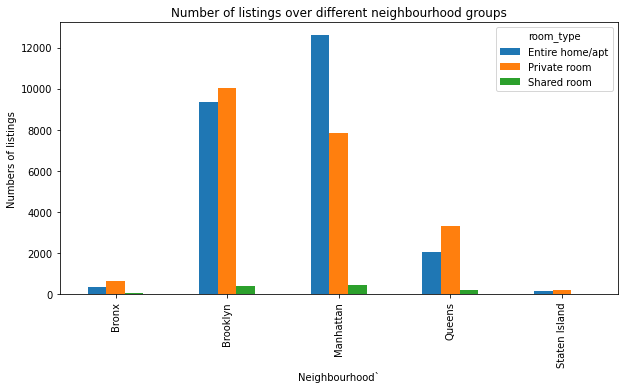

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
airbnb_df.groupby(['neighbourhood_group','room_type'])['id'].count().unstack().plot(kind="bar")
plt.title('Number of listings over different neighbourhood groups')
plt.ylabel('Numbers of listings')
plt.xlabel('Neighbourhood`')

##Exploring the categorical columns

**Visualizing different locations.**

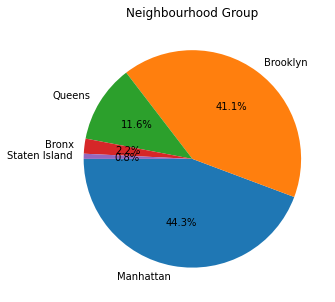

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group")
g = plt.pie(airbnb_df.neighbourhood_group.value_counts(), labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

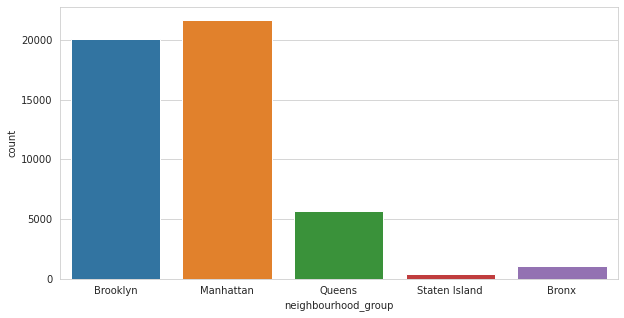

In [ ]:
#Visualising the data according to area
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='neighbourhood_group',data=airbnb_df)

*  Manhattan is the most demanded location followed by Brooklyn while Staten Island is the least in demand may be due to location factor as it seems to be isolated.

**Visualizing different Room-Types**

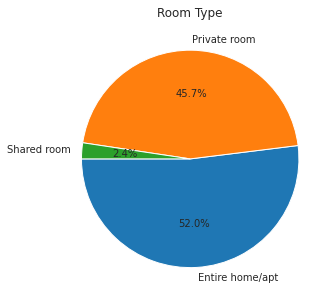

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Room Type")
g = plt.pie(airbnb_df.room_type.value_counts(), labels=airbnb_df.room_type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

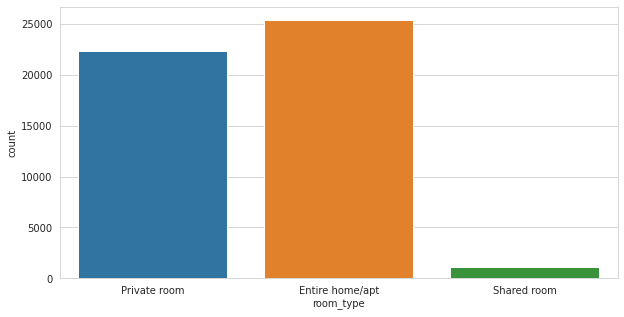

In [ ]:
#visualising the data according to room_type
plt.rcParams['figure.figsize'] = (10, 5)
sns.set_style('whitegrid')
sns.countplot(x='room_type',data=airbnb_df)

**Conclusion**
*  Among the different room types available, the most demanded ones are entire-homes/apt followed by private-rooms and lastly shared rooms.
*  People are mostly preferring entire home/apt or private rooms means they are valuing their comfort and privacy  more than money.

**Visualizing different room-types according to different locations.**

Text(0.5, 0, 'Neighbourhood`')

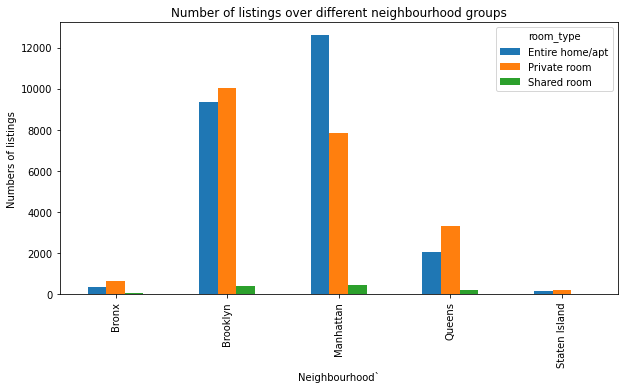

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
airbnb_df.groupby(['neighbourhood_group','room_type'])['id'].count().unstack().plot(kind="bar")
plt.title('Number of listings over different neighbourhood groups')
plt.ylabel('Numbers of listings')
plt.xlabel('Neighbourhood`')

Text(0.5, 0, 'Neighbourhood`')

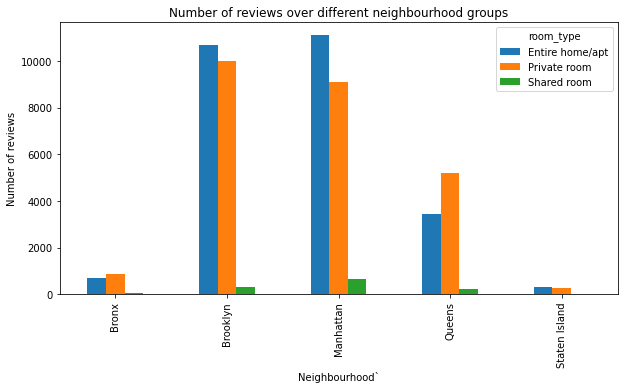

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
airbnb_df[~airbnb_df['reviews_per_month'].isna()].groupby(['neighbourhood_group','room_type'])['reviews_per_month'].sum().unstack().plot(kind="bar")
plt.title('Number of reviews over different neighbourhood groups')
plt.ylabel('Number of reviews')
plt.xlabel('Neighbourhood`')

**Conclusion**
*  In Manhattan people are mostly prefering Entire-home/apt which reflects their good economic condition or the city may be a good family vacation place having parks like **Central Park**.
*  Brooklyn is somewhat similar to Manhattan.
*  For Staten island there are minimum number of listings and have only 9 shared-room listings.
*   From the above two graphs we can see that the demand and supply are inline for almost all except for home/apartment in Brooklyn so there hosts can increase the listings.




## **Finding prices of different locations with their corresponding room_type**

## Analysing Different locations according to their room_type and corresponding median prices

In [ ]:
#extracting a df from airdnd_df
price_df = airbnb_df[['neighbourhood_group','room_type','price']]
#grouping this data frame according to their neighbourhood_group and room_type and assigning median prices
median_price_df =price_df.groupby(['neighbourhood_group','room_type']).median().reset_index()

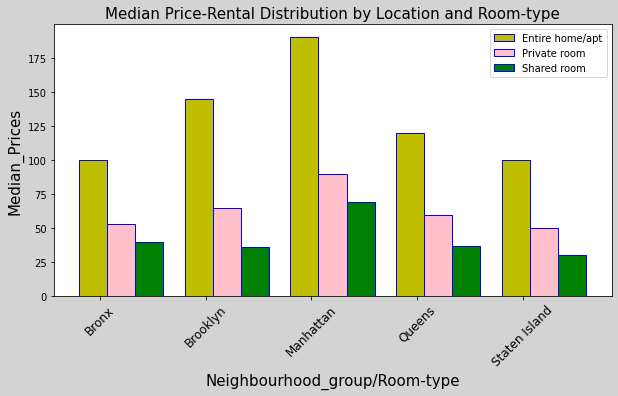

In [ ]:
#getting the unique locations
locations = median_price_df.neighbourhood_group.unique()
x_rooms1 = [0.8, 3.8, 6.8, 9.8, 12.8]
x_rooms2 = [1.6, 4.6, 7.6, 10.6, 13.6]
x_rooms3 = [2.4, 5.4, 8.4, 11.4, 14.4]
y_values1 = median_price_df[median_price_df['room_type'] == 'Entire home/apt']['price'].values
y_values2 = median_price_df[median_price_df['room_type'] == 'Private room']['price'].values
y_values3 = median_price_df[median_price_df['room_type'] == 'Shared room']['price'].values
fig,ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('lightgray')
plt.bar(x_rooms1, y_values1, color='y', edgecolor='b')
plt.bar(x_rooms2, y_values2, color='pink', edgecolor='b')
plt.bar(x_rooms3, y_values3, color='g', edgecolor='b')
ax.set_xticks(range(1,16,3))
ax.set_xticklabels(locations, fontsize='12')
for tick in ax.get_xticklabels():
  tick.set_rotation(45)
plt.xlabel('Neighbourhood_group/Room-type',fontsize='15')
plt.ylabel('Median_Prices', fontsize='15')
plt.legend(labels=median_price_df.room_type.unique(), loc='best')
plt.title('Median Price-Rental Distribution by Location and Room-type',fontsize='15')
plt.show()

**Conclusion**
*  Entire-home/apt of every location have higher prices followed by private-rooms and shared-rooms.
*  Manhattan is most demanded location followed by Brooklyn.
*  Manhattan is the costliest location for every room type may be due to their location or high demand followed by Brooklyn .
*  The price for private-room rentals of Manhattan is somewhat in the same range
of entire-home/apt rentals of other locations.


**Visualizing top 20 hosts and finding the reason behind it.** 

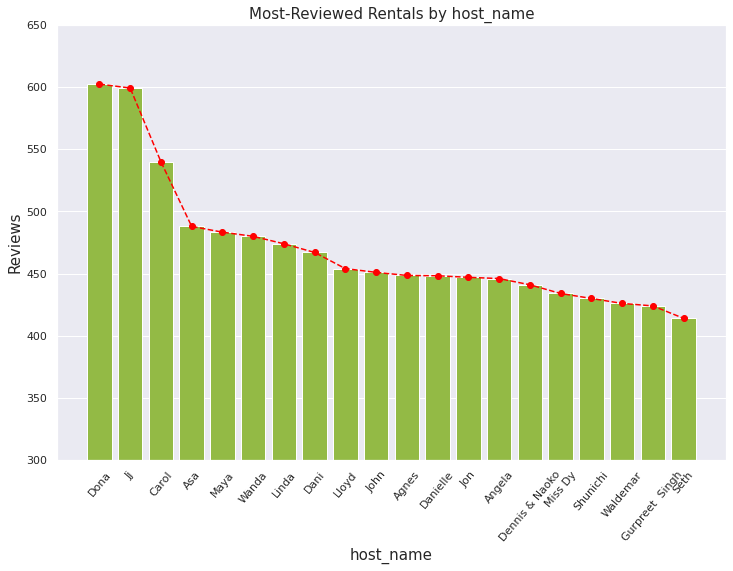

In [ ]:
most_review_host_df = airbnb_df.sort_values('number_of_reviews',ascending=False)
top_reviewed_host_df = most_review_host_df.loc[:,['host_name','number_of_reviews']][:30]
top_reviewed_host_df = top_reviewed_host_df.groupby('host_name').mean().sort_values('number_of_reviews',ascending=False).reset_index()
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(x=top_reviewed_host_df['host_name'],y=top_reviewed_host_df['number_of_reviews'].values,color='yellowgreen',ax=ax)
plt.plot(top_reviewed_host_df['number_of_reviews'], marker='o', color='red',linestyle='--')
plt.ylabel('Reviews', fontsize='15')
plt.xlabel('host_name',fontsize='15')
plt.ylim((300,650))
for ax in ax.get_xticklabels():
  ax.set_rotation(50)
plt.title('Most-Reviewed Rentals by host_name',fontsize='15')
plt.show()
sns.set()

In [ ]:
top_host=top_reviewed_host_df['host_name'].tolist()

In [ ]:
top_host_dict={}
for elem in top_host:
  avg_price=airbnb_df[airbnb_df['host_name']==elem].price.mean()
  top_host_dict[elem]=avg_price

top_host_avg_price_df=pd.DataFrame(top_host_dict.items(), columns=['Host', 'avg_price'])
top_host_avg_price_df.set_index('Host', inplace=True)
# top_host_avg_price_df

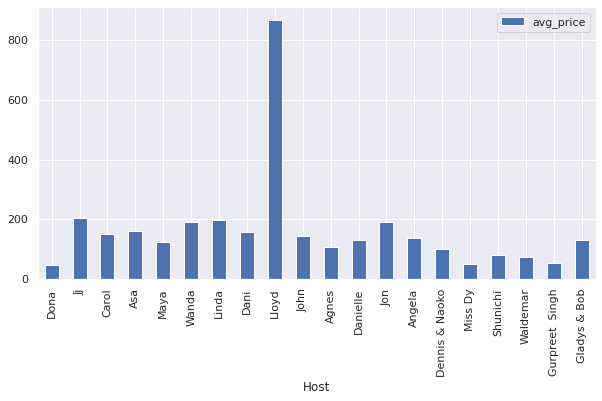

In [ ]:
top_host_avg_price_df.plot(kind='bar')

plt.show()

**Conclusion**
*  Almost every popular host have rental listings in the price range between 50 and 200 which is affordable, hence people are preferring them.

In [ ]:
def getfrequency(row):

  temp = airbnb_df[airbnb_df['minimum_nights']== row].groupby('neighbourhood_group')['id'].count().reset_index()
  
  temp['number_of_listings'] = (airbnb_df.groupby('neighbourhood_group')['id'].count().reset_index())['id']
  
  temp['id'] = temp['id'].div(temp['number_of_listings'].values,axis=0)
  
  temp.drop('number_of_listings',axis =1,inplace=True)
  temp['id'] = temp['id'].apply(lambda row: round(row*100,0))
  temp.sort_values('id',ascending=False,inplace=True)
  return temp.set_index('neighbourhood_group').to_dict()['id']

In [ ]:
minimum_nights_df = airbnb_df.groupby('minimum_nights')['reviews_per_month'].sum().reset_index()
minimum_nights_df['number_of_listings'] = (airbnb_df.groupby('minimum_nights')['id'].count().reset_index())['id']
minimum_nights_df['price'] = (airbnb_df.groupby('minimum_nights')['price'].median().reset_index())['price']
minimum_nights_df['number_of_reviews'] = (airbnb_df.groupby('minimum_nights')['number_of_reviews'].sum().reset_index())['number_of_reviews']
minimum_nights_df['neighbourhood_groups'] = minimum_nights_df['minimum_nights'].apply(getfrequency )
minimum_nights_df

,minimum_nights,reviews_per_month,number_of_listings,price,number_of_reviews,neighbourhood_groups
0,1,20325.34,12542,90.0,369740,"{'Queens': 39.0, 'Bronx': 34.0, 'Staten Island..."
1,2,16375.30,11626,110.0,348564,"{'Bronx': 33.0, 'Staten Island': 33.0, 'Brookl..."
2,3,8304.28,7931,120.0,206696,"{'Brooklyn': 18.0, 'Bronx': 17.0, 'Manhattan':..."
3,4,2723.82,3276,125.0,71261,"{'Staten Island': 12.0, 'Brooklyn': 7.0, 'Manh..."
4,5,1944.80,3016,119.0,49148,"{'Brooklyn': 7.0, 'Manhattan': 6.0, 'Bronx': 5..."
5,6,419.95,746,120.0,10117,"{'Brooklyn': 2.0, 'Manhattan': 2.0, 'Bronx': 1..."
6,7,801.99,2039,100.0,18963,"{'Brooklyn': 5.0, 'Manhattan': 4.0, 'Queens': ..."
7,8,50.67,130,99.5,1229,"{'Brooklyn': 6.0, 'Manhattan': 0.0, 'Queens': ..."
8,9,27.93,80,109.5,597,"{'Brooklyn': 4.0, 'Manhattan': 0.0, 'Queens': ..."
9,10,136.64,479,99.0,3727,"{'Brooklyn': 1.0, 'Manhattan': 1.0, 'Queens': ..."


# **Conclusions**

*   Queens and Bronx have majority of listings having minimum number of nights required as 1.
*   The number of listings gets sudden jump as we move from 1 at certain minimum number of nights values like 7,10,14 and 30.



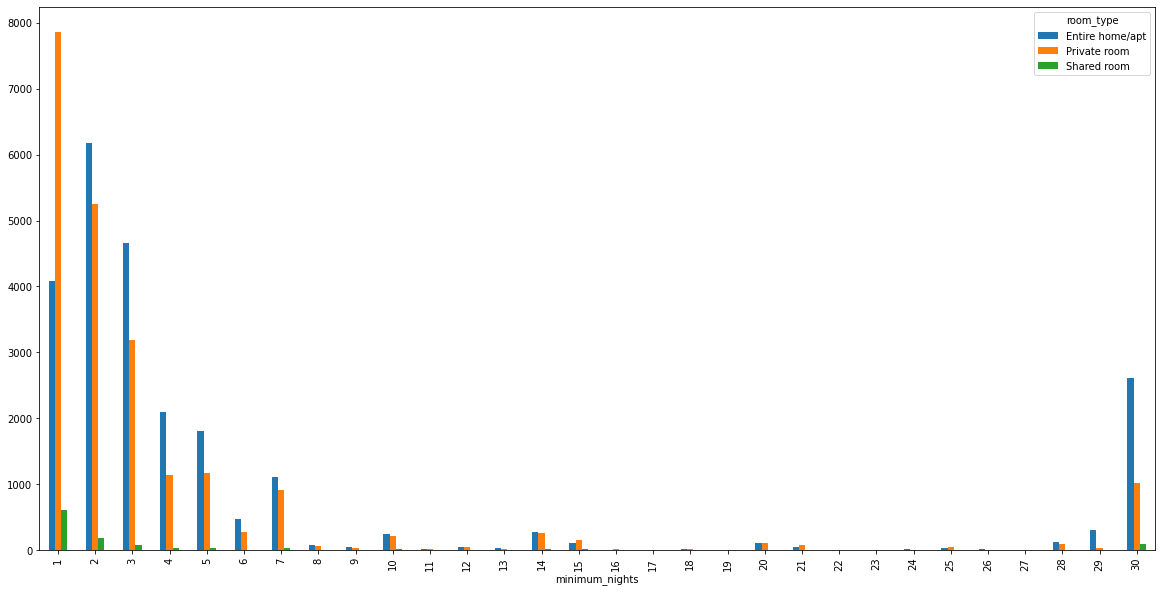

In [ ]:
airbnb_df.groupby(['minimum_nights','room_type'])['id'].count().unstack().plot(kind="bar")

* We can see in the graph that most of the listings with one day minimum requirement are private/single which targets the users who comes on business meetings and such.
* As the number of nights are increasing entire home/apartment is becomming higher as they target the users who come with friends/family to probably explore the city.








# Doing some analysis on hosts and areas of listings

In [ ]:
# Get the top 5 hosts that posts maximum number of listings
listing_count_df = airbnb_df['host_id'].value_counts().reset_index().rename(columns={'index':'host_id','host_id':'Number of listings'})
listing_count_df.head()

,host_id,Number of listings
0,219517861,327
1,107434423,224
2,30283594,117
3,137358866,103
4,12243051,96


In [ ]:
#  Get the 5 host_ids that posts minimum number of listings
listing_count_df.tail()

,host_id,Number of listings
36599,322697,1
36600,95485067,1
36601,167560332,1
36602,263742622,1
36603,1288080,1


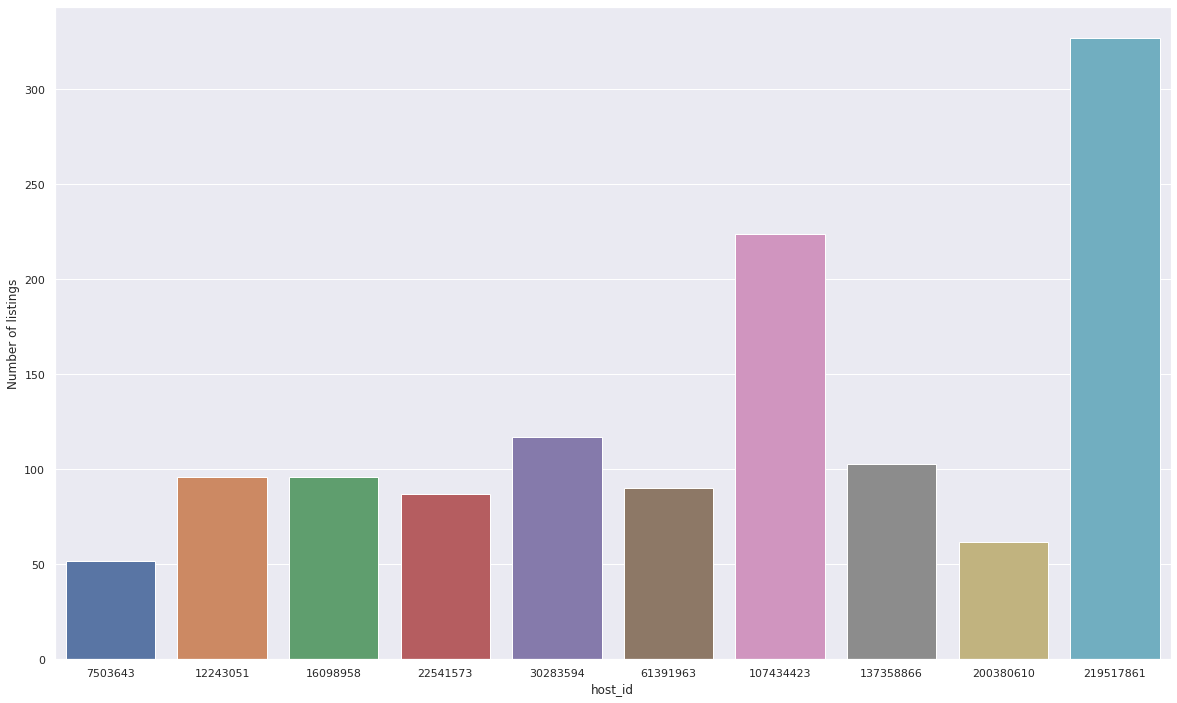

In [ ]:
# Get visualizing the number of listings by top 10 host using bar plot.
sns.set(rc={'figure.figsize':(20,12)})
sns.barplot(data=listing_count_df.head(10),x ='host_id',y='Number of listings')

Top words used in top listings based on number of reviews

In [ ]:

stops = ['it','in','and','a','the','with','of','&','1','2','3','to','w','from','for','+','on','|','by','One']

words = {}
airbnb_df = airbnb_df[~airbnb_df['name'].isna()]
temp = airbnb_df.sort_values('number_of_reviews',ascending=False)[0:5000]
for name in temp['name']:
  for item in name.replace("["," ").replace(',',' ').replace('.',' ').replace('!',' ').replace(':',' ').replace('?',' ').replace('@',' ').replace('-',' ').replace('{',' ').replace('}',' ').replace('/',' ').split():
    if item.lower() not in stops:


      words[item.lower()] = words.get(item.lower(),0) + 1

words = {k: words[k] for k in sorted(words, key=words.get, reverse=True)}

most_frequent_words = (list(words.keys()))[0:20]
most_frequent_words

['room',
 'private',
 'bedroom',
 'cozy',
 'apt',
 'apartment',
 'manhattan',
 'brooklyn',
 'studio',
 'park',
 'near',
 'spacious',
 'nyc',
 'east',
 'sunny',
 'williamsburg',
 'brownstone',
 'home',
 'beautiful',
 'loft']

These are the most frequently occuring words in the names, so these words can be thoght of the kind of words that people are attracted to.

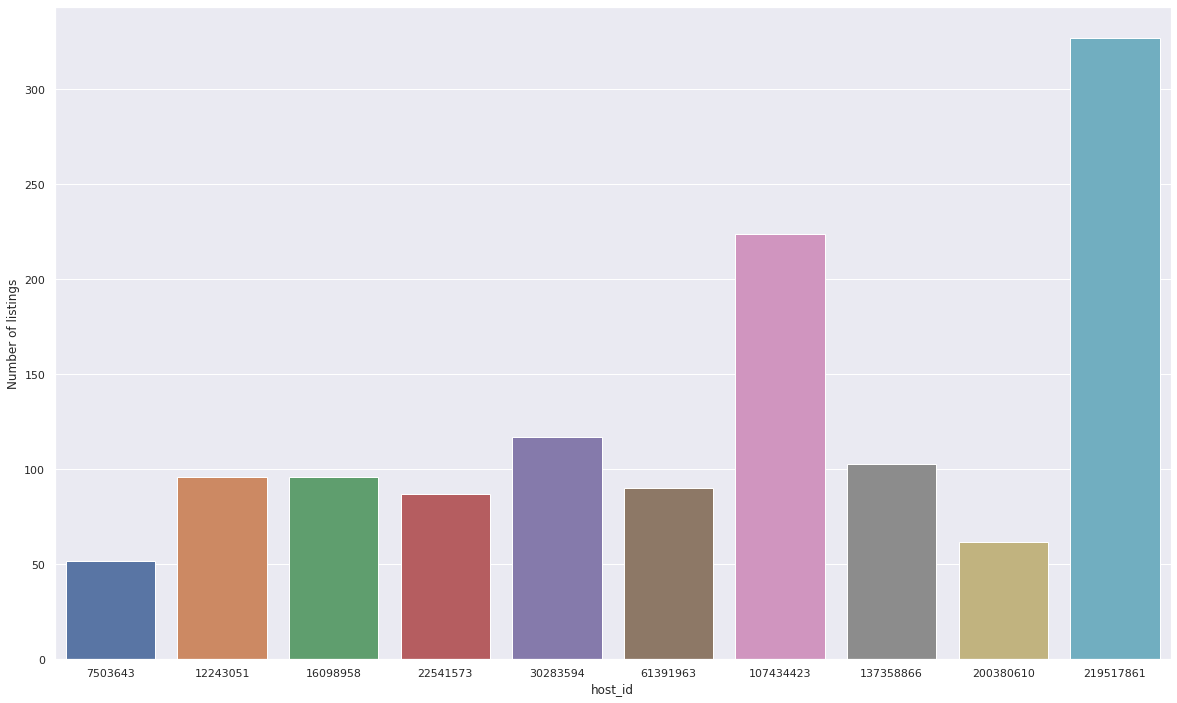

In [ ]:
# Get visualizing the number of listings by top 10 host using bar plot.
sns.set(rc={'figure.figsize':(20,12)})
sns.barplot(data=listing_count_df.head(10),x ='host_id',y='Number of listings')

From the above chart, we can see that the top 10 hosts post listings of minimum 50 or more.4 hosts post with more than 100 listings.

##Analysis on availability_365 column

In [ ]:
#extracting those rows having 0 value in availability_365 column
zero_availability_df=airbnb_df[airbnb_df['availability_365']==0]

There may be two possibilities for 0 value in availability column.


*   May be that place was previously available for booking but closed currently.
*   There may be a chance of bad entry.



In [ ]:
#sorting them according to their last review date
zero_availability_df.sort_values('last_review',ascending=False,inplace=True,ignore_index=True)
print(zero_availability_df.shape)
zero_availability_df.head()

(17533, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,34151215,Bright and Artsy 2 Bedroom Apartment,257810280,Leslie,Brooklyn,Bedford-Stuyvesant,40.67935,-73.93715,Entire home/apt,100,1,5,2019-07-08,5.00,1,0,POINT (-73.93715 40.67935)
1,31714168,5 min away from LGA,213014559,Kam,Queens,East Elmhurst,40.76893,-73.87712,Entire home/apt,135,1,17,2019-07-08,3.57,2,0,POINT (-73.87712 40.76893)
2,25380654,"Cozy, Confortable, Modern spacious and nice Room",191621249,Geraldine,Manhattan,Chelsea,40.74284,-73.99842,Private room,99,1,95,2019-07-08,7.20,2,0,POINT (-73.99842 40.74284)
3,21264131,Beautiful Super Cozy Studio,67226812,RaShaan,Brooklyn,Bedford-Stuyvesant,40.68744,-73.94905,Entire home/apt,95,1,89,2019-07-08,4.43,1,0,POINT (-73.94905 40.68744)
4,13216246,Comfy Greenpoint room w/ easy access to Manhat...,6531491,Stephen,Brooklyn,Greenpoint,40.72217,-73.94800,Private room,75,1,55,2019-07-08,1.46,1,0,POINT (-73.94800 40.72217)


**Conclusion**

There are more than 17000 rows having availability as 0.
So this should be the case that those rental places are currently closed or not accepting new bookings.

We can check their last_review date and can assume that after that they are not operational.

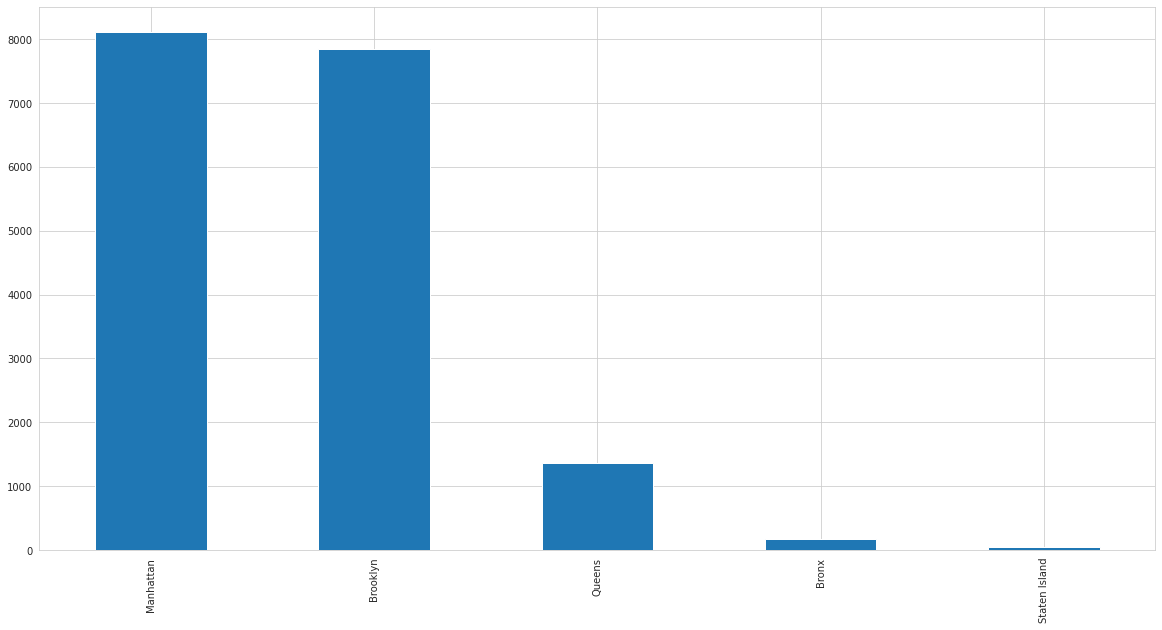

In [ ]:
zero_availability_df['neighbourhood_group'].value_counts().plot(kind='bar')


##Price Analysis

In [ ]:
airbnb_df.sort_values('price',ascending=False,ignore_index=True).head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,0.00,1,83,POINT (-73.98665 40.77213)
1,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,POINT (-73.91651 40.76810)
2,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0,POINT (-73.95739 40.73260)
3,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,0.00,1,365,POINT (-73.98566 40.71980)
4,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0,POINT (-73.93898 40.79264)


Here the price value like 0 and 10000 are outliers.

**Plotting the Correlation Matrix**

In [ ]:
corr = airbnb_df.corr()
# corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.00,0.59,-0.00,0.09,0.01,-0.01,-0.32,0.18,0.13,0.09
host_id,0.59,1.00,0.02,0.13,0.02,-0.02,-0.14,0.21,0.15,0.20
latitude,-0.00,0.02,1.00,0.08,0.03,0.02,-0.02,-0.02,0.02,-0.01
longitude,0.09,0.13,0.08,1.00,-0.15,-0.06,0.06,0.14,-0.11,0.08
price,0.01,0.02,0.03,-0.15,1.00,0.04,-0.05,-0.05,0.06,0.08
minimum_nights,-0.01,-0.02,0.02,-0.06,0.04,1.00,-0.08,-0.12,0.13,0.14
number_of_reviews,-0.32,-0.14,-0.02,0.06,-0.05,-0.08,1.00,0.59,-0.07,0.17
reviews_per_month,0.18,0.21,-0.02,0.14,-0.05,-0.12,0.59,1.00,-0.05,0.16
calculated_host_listings_count,0.13,0.15,0.02,-0.11,0.06,0.13,-0.07,-0.05,1.00,0.23
availability_365,0.09,0.20,-0.01,0.08,0.08,0.14,0.17,0.16,0.23,1.00
